In [1]:
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
import gc
import cv2
from tqdm import tqdm
tqdm.pandas()
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append("..")

In [3]:
from tensorflow.keras.layers import Input,Conv2D,Lambda,Dropout,MaxPooling2D
from tensorflow.keras.layers import Conv2DTranspose,concatenate
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard

In [4]:
def seed_everything(seed=51):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
seed_everything(seed=51)

In [17]:
WIDTH = 256
HEIGHT = 256
CHANNELS = 3
#Model Parameters
EPOCHS = 10
BATCH_SIZE = 16

USE_TENSORBOARD = False

In [6]:
input_shape = (WIDTH,HEIGHT,CHANNELS)

In [7]:
from model import get_model

In [8]:
#get_model?

In [9]:
model = get_model(input_shape,compiling=True)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [11]:
input_data = np.load('../data/input_data.npy')
target_data = np.load('../data/target_data.npy')

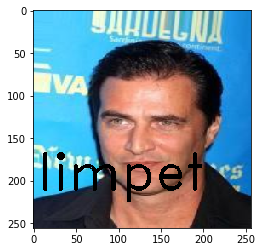

In [12]:
plt.imshow(input_data[10000])

In [13]:
X_test = input_data[20000:]
y_test = target_data[20000:]

In [14]:
tf.keras.backend.clear_session()

In [15]:
X_train, X_val, y_train, y_val = train_test_split(input_data, target_data, test_size=0.20, random_state=42)

In [16]:
del input_data,target_data
gc.collect()

17

In [18]:
if USE_TENSORBOARD:
    checkpoint = ModelCheckpoint('model_epoch_{}.h5'.format(EPOCHS),verbose=1,save_best_only=True)
    early_stopping = EarlyStopping(patience=3,monitor='val_loss')
    tensorboard = TensorBoard(log_dir='../logs')
    callbacks = [checkpoint,early_stopping,tensorboard]
else:
    checkpoint = ModelCheckpoint('model_epoch_{}.h5'.format(EPOCHS),verbose=1,save_best_only=True)
    early_stopping = EarlyStopping(patience=3,monitor='val_loss')
    callbacks = [checkpoint,early_stopping]

In [19]:
model.fit(x = X_train, y = y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,\
          verbose=1,validation_data=(X_val,y_val),callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples
19984/20000 [============================>.] - ETA: 0s - loss: 672.2603 - mean_squared_error: 672.2601
Epoch 00001: val_loss improved from inf to 675.70328, saving model to model_epoch_1.h5
20000/20000 [==============================] - 554s 28ms/sample - loss: 671.8423 - mean_squared_error: 671.8422 - val_loss: 675.7033 - val_mean_squared_error: 675.7031


In [20]:
val_preds = model.predict(X_val)

In [1]:
np.save('../data/X_train.npy',X_train)
print("="*30)
np.save('../data/y_train.npy',y_train)
print("="*30)
np.save('../data/X_val.npy',X_val)
print("="*30)
np.save('../data/y_val.npy',y_val)
print("="*30)
np.save('../data/X_test.npy',X_test)
print("="*30)
np.save('../data/y_test.npy',y_test)
print("="*30)

In [21]:
val_preds.shape

(5000, 256, 256, 3)

In [22]:
val_preds[0].min(),val_preds[0].max()

(1.6815375, 237.81017)

In [23]:
X_val[0].min(),X_val[0].max()

(0, 255)

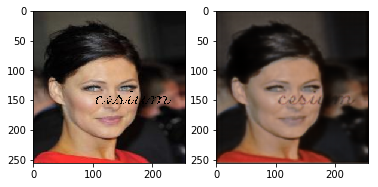

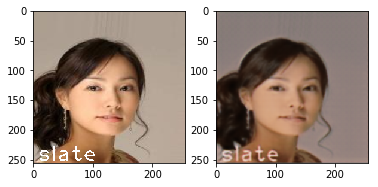

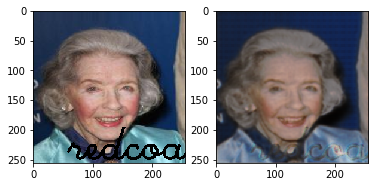

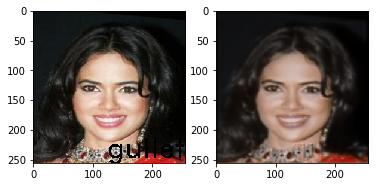

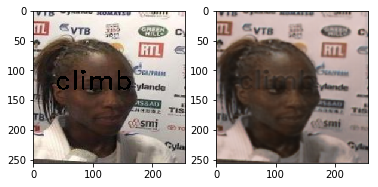

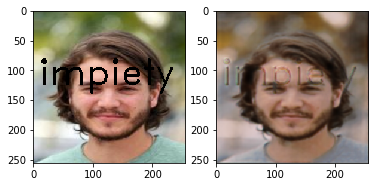

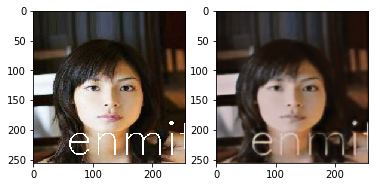

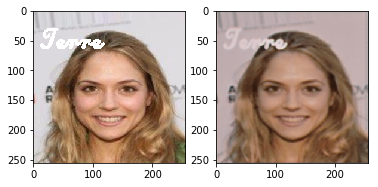

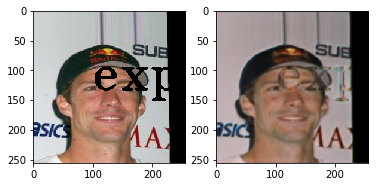

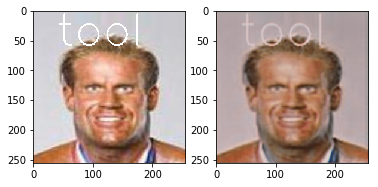

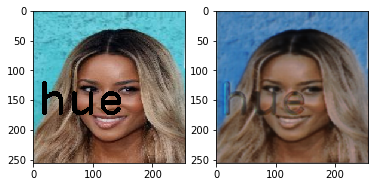

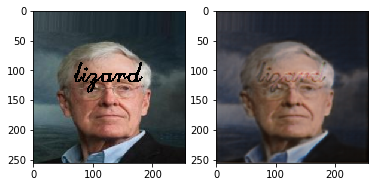

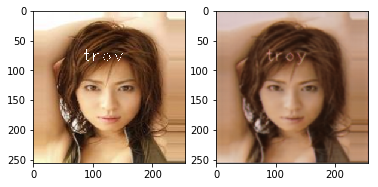

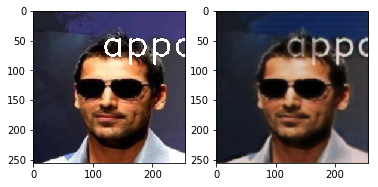

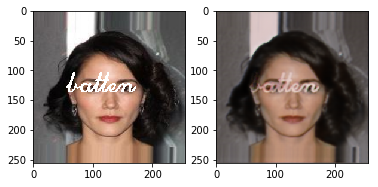

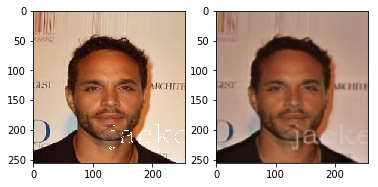

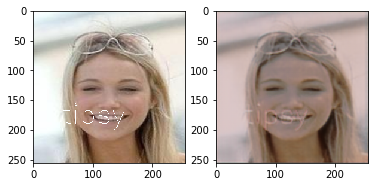

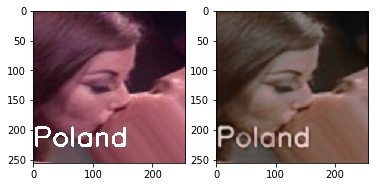

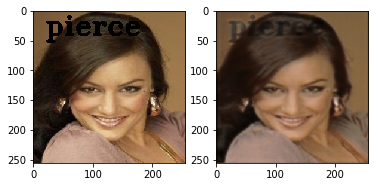

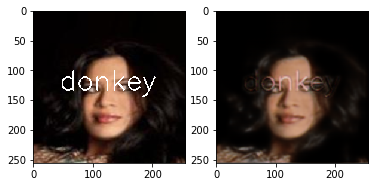

In [24]:
for image_no in range(347,367,1):
    plt.subplot(1, 2, 1)
    plt.imshow(X_val[image_no].astype('uint8'))
    plt.subplot(1, 2, 2)
    plt.imshow(val_preds[image_no].astype('uint8'))
    plt.show()